In [34]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans


In [35]:
data = pd.read_csv('clustering.csv')
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,LP002953,Male,Yes,3+,Graduate,No,5703,0.0,128.0,360.0,1.0,Urban,Y
377,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
378,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
379,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y


In [40]:
# statistics of the data
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,381.000000,381.000000,381.000000,370.000000,351.000000
mean,3579.845144,1277.275381,104.986877,340.864865,0.837607
std,1419.813818,2340.818114,28.358464,68.549257,0.369338
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2600.000000,0.000000,90.000000,360.000000,1.000000
50%,3333.000000,983.000000,110.000000,360.000000,1.000000
75%,4288.000000,2016.000000,127.000000,360.000000,1.000000
max,9703.000000,33837.000000,150.000000,480.000000,1.000000


In [48]:
# standardizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
#data_scaled = scaler.fit_transform(data)

# statistics of scaled data
pd.DataFrame(data).describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,381.000000,381.000000,381.000000,370.000000,351.000000
mean,3579.845144,1277.275381,104.986877,340.864865,0.837607
std,1419.813818,2340.818114,28.358464,68.549257,0.369338
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2600.000000,0.000000,90.000000,360.000000,1.000000
50%,3333.000000,983.000000,110.000000,360.000000,1.000000
75%,4288.000000,2016.000000,127.000000,360.000000,1.000000
max,9703.000000,33837.000000,150.000000,480.000000,1.000000


In [51]:
# defining the kmeans function with initialization as k-means++
kmeans = KMeans(n_clusters=2, init='k-means++')

# fitting the k means algorithm on scaled data
kmeans.fit(data)

In [52]:
# inertia on the fitted data
kmeans.inertia_

AttributeError: 'KMeans' object has no attribute 'inertia_'

In [ ]:
# fitting multiple k-means algorithms and storing the values in an empty list
SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init='k-means++')
    kmeans.fit(data_scaled)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [42]:
# k means using 5 clusters and k-means++ initialization
kmeans = KMeans(n_jobs = -1, n_clusters = 5, init='k-means++')
kmeans.fit(data_scaled)
pred = kmeans.predict(data_scaled)


NameError: name 'data_scaled' is not defined

In [43]:
frame = pd.DataFrame(data_scaled)
frame['cluster'] = pred
frame['cluster'].value_counts()

NameError: name 'data_scaled' is not defined

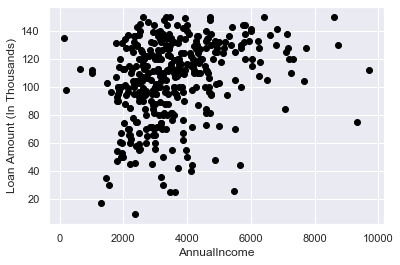

In [44]:
X = data[["LoanAmount","ApplicantIncome"]]
#Visualise data points
plt.scatter(X["ApplicantIncome"],X["LoanAmount"],c='black')
plt.xlabel('AnnualIncome')
plt.ylabel('Loan Amount (In Thousands)')
plt.show()

In [45]:
x = data.copy()


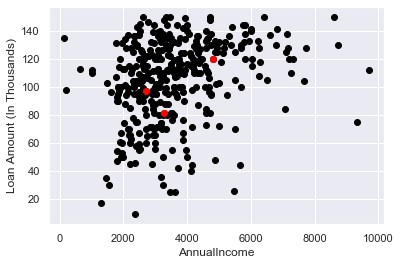

In [46]:
# Step 1 and 2 - Choose the number of clusters (k) and select random centroid for each cluster

#number of clusters
K=3

# Select random observation as centroids
Centroids = (X.sample(n=K))
plt.scatter(X["ApplicantIncome"],X["LoanAmount"],c='black')
plt.scatter(Centroids["ApplicantIncome"],Centroids["LoanAmount"],c='red')
plt.xlabel('AnnualIncome')
plt.ylabel('Loan Amount (In Thousands)')
plt.show()

In [39]:
# Step 3 - Assign all the points to the closest cluster centroid
# Step 4 - Recompute centroids of newly formed clusters
# Step 5 - Repeat step 3 and 4

diff = 1
j=0

while(diff!=0):
    XD=X
    i=1
    for index1,row_c in Centroids.iterrows():
        ED=[]
        for index2,row_d in XD.iterrows():
            d1=(row_c["ApplicantIncome"]-row_d["ApplicantIncome"])**2
            d2=(row_c["LoanAmount"]-row_d["LoanAmount"])**2
            d=np.sqrt(d1+d2)
            ED.append(d)
        X[i]=ED
        i=i+1

    C=[]
    for index,row in X.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    X["Cluster"]=C
    Centroids_new = X.groupby(["Cluster"]).mean()[["LoanAmount","ApplicantIncome"]]
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (Centroids_new['LoanAmount'] - Centroids['LoanAmount']).sum() + (Centroids_new['ApplicantIncome'] - Centroids['ApplicantIncome']).sum()
        print(diff.sum())
    Centroids = X.groupby(["Cluster"]).mean()[["LoanAmount","ApplicantIncome"]]

C:\Users\123\anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\123\anaconda3\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


411.9802489598224
343.35254191693497
204.7192620993429
212.30400931095977
329.8885770249886
217.7532044140301
156.82441978145494
216.97633889097736
61.779061837190085
80.42253001270922
99.50821192263949
27.38200063816943
18.274686272279013
9.21023994083339
18.345487493007468
46.27013250786139
0.0
